**FASHION MNIST IMAGE CLASSIFICATION USIND DEEP LEARNING**

The Fashion-MNIST clothing classification problem is a new standard dataset used in computer vision and deep learning.

Although the dataset is relatively simple, it can be used as the basis for learning and practicing how to develop, evaluate, and use deep convolutional neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

2.4.1


**LOADING DATA**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
x_train[120].shape

(28, 28)

4423680/4422102 [==============================] - 0s 0us/step


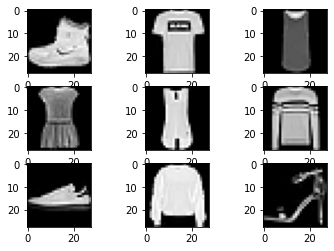

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


**BUILDING MODEL**

In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.6873 - accuracy: 0.7499 - val_loss: 0.3837 - val_accuracy: 0.8565
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3681 - accuracy: 0.8610 - val_loss: 0.3368 - val_accuracy: 0.8743
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3115 - accuracy: 0.8807 - val_loss: 0.3141 - val_accuracy: 0.8830
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2725 - accuracy: 0.8970 - val_loss: 0.3250 - val_accuracy: 0.8823
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2496 - accuracy: 0.9069 - val_loss: 0.3035 - val_accuracy: 0.8911
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2248 - accuracy: 0.9135 - val_loss: 0.3154 - val_accuracy: 0.8851
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2090 - accuracy: 0.9210 - val_loss: 0.3058 -

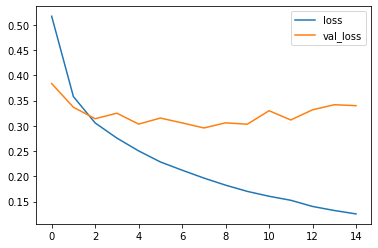

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

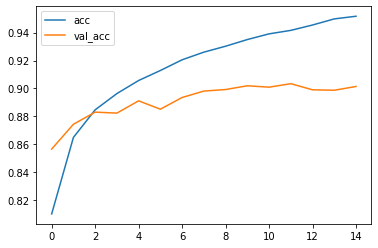

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[852   1  23  15   2   1  99   0   7   0]
 [  2 978   1  12   2   0   3   0   2   0]
 [  8   0 880   8  46   0  57   0   1   0]
 [ 19  10  23 894  32   0  21   0   1   0]
 [  3   1  51  27 860   0  57   0   1   0]
 [  1   0   0   1   0 976   0  13   2   7]
 [114   0  67  22 108   0 675   0  14   0]
 [  0   0   0   0   0  11   0 964   0  25]
 [  3   1   4   5   6   2   4   2 973   0]
 [  0   0   0   0   0   6   1  30   1 962]]


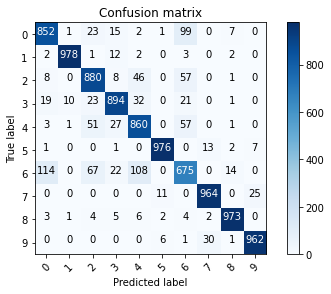

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

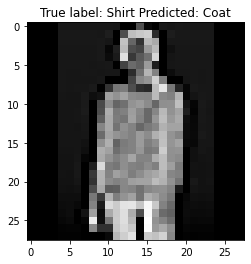

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));